In [1]:
from autumn.tools.project import get_project
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
from autumn.tools.calibration.targets import get_target_series
import pandas as pd

In [2]:
project = get_project("covid_19", "victoria_2021")

In [3]:
# custom_params = project.param_set.baseline.update(dict(contact_rate = 0.031))
custom_params = project.param_set.baseline
model = project.run_baseline_model(custom_params)
derived_df = model.get_derived_outputs_df()

In [7]:
[c for c in derived_df.columns if "notif" in c]

['notifications_for_cluster_west_metro',
 'accum_notifications_for_cluster_west_metro',
 'notifications_for_cluster_south_metro',
 'accum_notifications_for_cluster_south_metro',
 'notifications_for_cluster_south_east_metro',
 'accum_notifications_for_cluster_south_east_metro',
 'notifications_for_cluster_north_metro',
 'accum_notifications_for_cluster_north_metro',
 'notifications_for_cluster_grampians',
 'accum_notifications_for_cluster_grampians',
 'notifications_for_cluster_loddon_mallee',
 'accum_notifications_for_cluster_loddon_mallee',
 'notifications_for_cluster_hume',
 'accum_notifications_for_cluster_hume',
 'notifications_for_cluster_gippsland',
 'accum_notifications_for_cluster_gippsland',
 'notifications_for_cluster_barwon_south_west',
 'accum_notifications_for_cluster_barwon_south_west',
 'notifications']

In [4]:
output = "notifications"
notif_dates, notif_values = get_target_series(project.calibration.targets, REF_DATE, output)

KeyError: 'notifications'

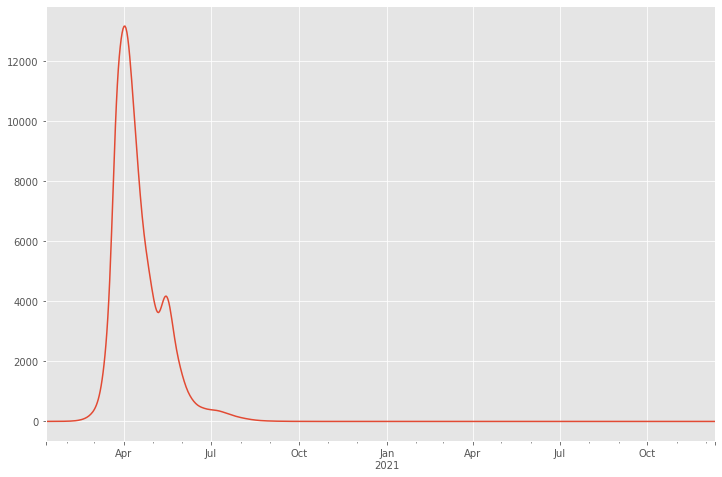

In [9]:
fig = pyplot.figure(figsize=(12, 8))
pyplot.style.use("ggplot")
axis = fig.add_subplot()
axis = derived_df[output].plot()
# axis.scatter(notif_dates, notif_values, c="k")

In [ ]:
fig = pyplot.figure(figsize=(12, 8))
pyplot.style.use("ggplot")
axis = fig.add_subplot()
axis = derived_df["cdr"].plot()